# Unsupervised Analysis of Days of Week

## Treating crossings each day as features to learn about the relationships between various days.

### Based on Jake Vanderplas's [Youtube videos](https://www.youtube.com/watch?v=DjpCHNYQodY&index=5&list=PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ)



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get Data

In [2]:
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()

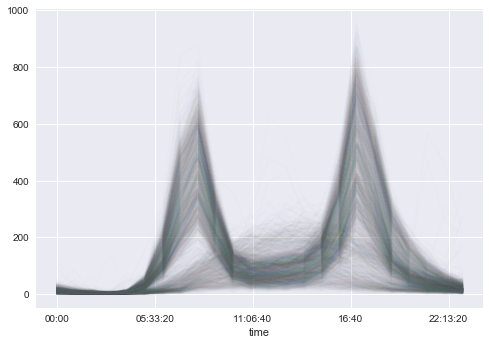

In [3]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01);

In [4]:
pivoted.head()

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,...,2018-07-22,2018-07-23,2018-07-24,2018-07-25,2018-07-26,2018-07-27,2018-07-28,2018-07-29,2018-07-30,2018-07-31
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0,...,20.0,5.0,6.0,17.0,7.0,11.0,21.0,27.0,5.0,8.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0,...,11.0,9.0,4.0,5.0,6.0,13.0,21.0,16.0,9.0,8.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0,...,3.0,5.0,3.0,10.0,3.0,5.0,4.0,14.0,4.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0,...,4.0,4.0,4.0,5.0,3.0,6.0,8.0,8.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0,...,10.0,14.0,15.0,17.0,13.0,12.0,6.0,12.0,15.0,16.0


## Principal Component Analysis

In [5]:
X = pivoted.fillna(0).T.values
X.shape

(2128, 24)

In [6]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(2128, 2)

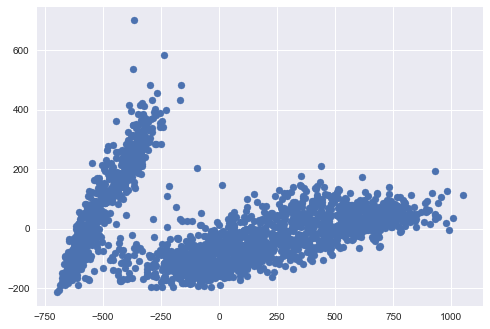

In [7]:
plt.scatter(X2[:, 0], X2[:, 1])

## Unsupervised Clustering

In [8]:
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
np.unique(labels)

array([0, 1], dtype=int64)

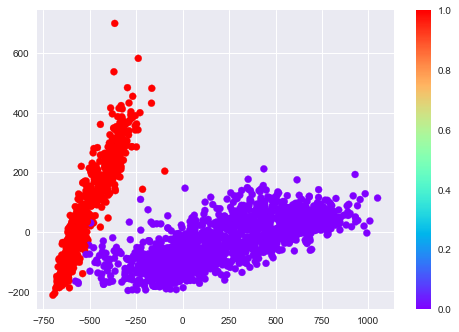

In [9]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar();

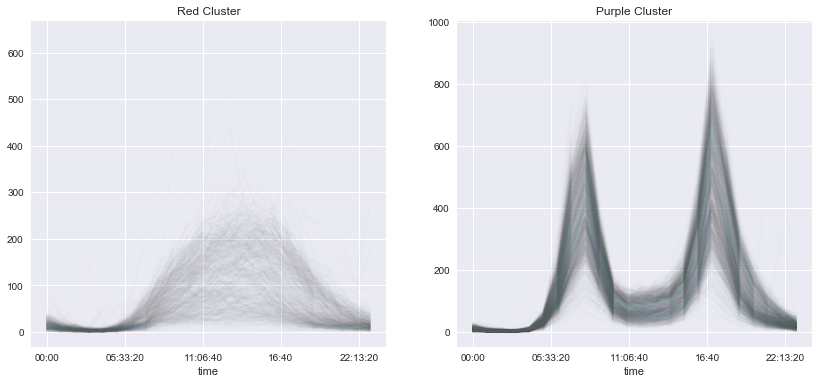

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.01, ax=ax[0])
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.01, ax=ax[1]);

ax[0].set_title('Red Cluster')
ax[1].set_title('Purple Cluster');

## Comparing the Day of the Week

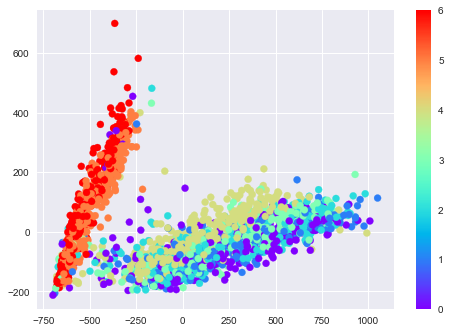

In [11]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing Outliers

The following points are weekdays with a holiday-like pattern

In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2017-12-26',
               '2018-01-01', '2018-05-28', '2018-07-04'],
              dtype='datetime64[ns]', freq=None)

### What's up with Feb 6, 2017?  [Snow Storm](https://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/)